# 03_test_modflow_cfp

This notebook test the setup and execution of a MODFLOW-2005 Conduit Flow Process (CFP) simulation for karst systems using the `flopy` Python package.

Authors: Alexis Neven & Valentin Dall'Alba

The workflow includes:
- Model grid and time discretization
- Initial and boundary condition setup
- Conduit and matrix property assignment
- Output control and simulation execution
- Visualization of results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import flopy as fp
from flopy.utils.gridintersect import GridIntersect

flopy is installed in c:\users\wdall\anaconda3\envs\nagra_2020\lib\site-packages\flopy


In [3]:
exec(open('generate_karst_functions/function_cfp_run.py').read())

## Create a mf5 model

In [16]:
#initialize the model
model_fp = Model_cfp()

#define model resolution and model dimension
sx = 5
sy = 5
nx = int(2000/sx)
ny = int(200/sy)

*** Model is initialized! 0 ***


In [18]:
#define model set up
model_fp.set_dimension(nrow=ny,ncol=nx,delc=sx,delr=sy,zbot=-2)
model_fp.set_time_periode()
model_fp.init_discretization()

Dimensions are set! 1
Time period is set! 2
*** Model is discretized! 3 ***


### Set Initial condition and boundary condition

In [19]:
#define the output position of the karst system
out_position = np.loadtxt('test_val/cas_1_123456789/tunnel_info.txt')
out_x = int(out_position[0])
out_y = int(out_position[1])
out_node = int(out_position[2])

In [20]:
out_position, out_x, out_y

(array([   6.,    9., 1262.]), 6, 9)

In [21]:
#initial condition
model_fp.set_bdc_type()
model_fp.set_bdc_val()
#model_fp.set_bdc_val(matrix_ini_bdc=True, val=head)
#<0 = cst head
#Top
model_fp.bdc_type[0,-1,:] = -1
model_fp.bdc_val[0,-1,:]  = 800
#Tunnel
#model_fp.bdc_type[0,out_y,out_x] = -1
#model_fp.bdc_val[0,out_y,out_x]  = 400
model_fp.init_bdc()
model_fp.set_flow_prop()
model_fp.init_flow_prop()

Boundary cell types are set! 4
Boundary cell values are set! 5
*** Boundary conditions are initialized! 6 ****
Flow properties are defined! 7
*** Flow properties are initialized! 8 ***


### Set matrix properties

In [22]:
model_fp.set_flow_prop()
model_fp.init_flow_prop()

Flow properties are defined! 7
*** Flow properties are initialized! 8 ***


### Set output control files

In [23]:
model_fp.init_output_control()

*** Output control parameters are initialized! 9 ***


### Set cfp properties

In [24]:
path_file_cfp = 'test_val/cas_1_123456789/' #path to the pykasso input files
model_fp.set_cfp_node_oc(path_file_cfp)
model_fp.init_cfp_node_oc(1,[out_node+1],0,[model_fp.nb_pipe])

Output control nodes are set! 10
*** Output control nodes are initialized! 11 ***


In [25]:
model_fp.set_conduit_recharge_prop()
model_fp.init_conduit_recharge_prop()
model_fp.set_conduit_flow_prop()
model_fp.init_conduit_flow_prop()

Conduit recharge properties are set! 12
*** Conduit recharge properties are initialized 13 ***
Conduit flow properties are set! 14
*** Conduit flow properties are initialized! 15***


### Write input file

In [26]:
model_fp.write_input_files()

*** Input files are written! 16***


### Update input file for cfp

In [27]:
model_fp.update_input_files()

*** Input files are modified! 17***


### Run simulation and clean repository

In [28]:
model_fp.model.run_model()
model_fp.clean_repo()

FloPy is using the following  executable to run the model: .\mf2005cfp.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.8.00_cfp 02/23/2011                   

 Using NAME file: model_mf5cfp.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2020/09/02 17:20:45

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2020/09/02 19:14:52
 Elapsed run time:  1 Hours, 54 Minutes,  7 Seconds

  Normal termination of simulation
Repository is clean!


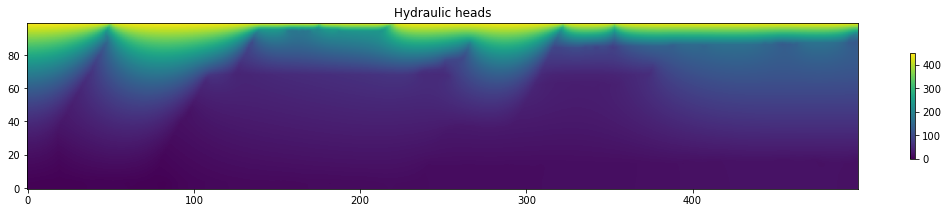

In [47]:
head = model_fp.plot_heads('mf5_cfp_files/')

### To visualise the network shape and output position (manual)

In [75]:
network = np.zeros((int(nx),int(ny)))
i = 0
nb = 123456789
path_output_simplification = 'pykasso_networks_simply/'
node_name = path_output_simplification+'nodes_cas1_123456789_simply.txt'
nodes = np.loadtxt(node_name)[:,1:]
for n in nodes:
    network[int(n[1]/sx),int(n[0]/sy)] = 1

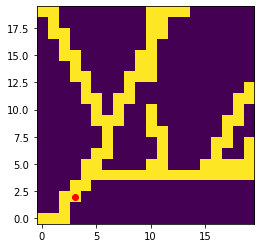

In [76]:
plt.imshow(network, origin='bot')
plt.plot(out_x, out_y,'or')
plt.show()